YOUR NAME
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [49]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')
    
print(mushrooms_df.columns)

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']
Index(['type', 'ca

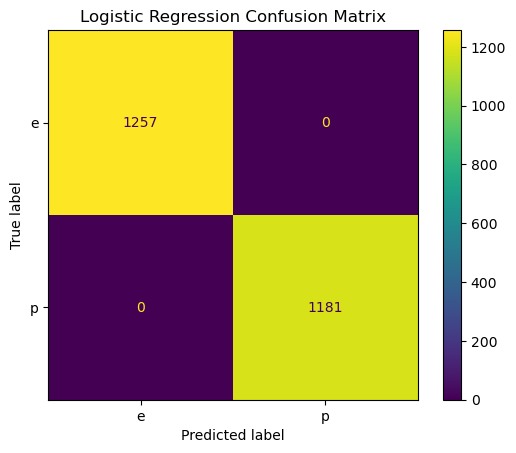

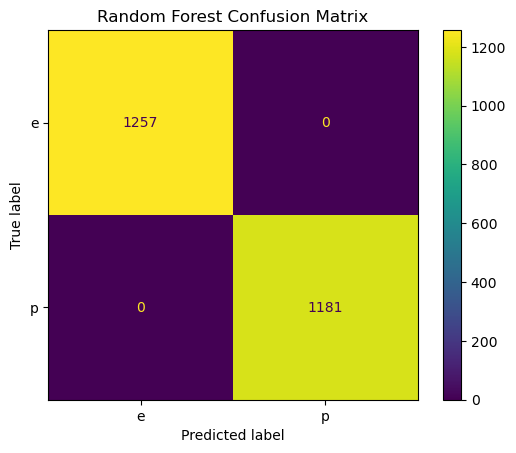

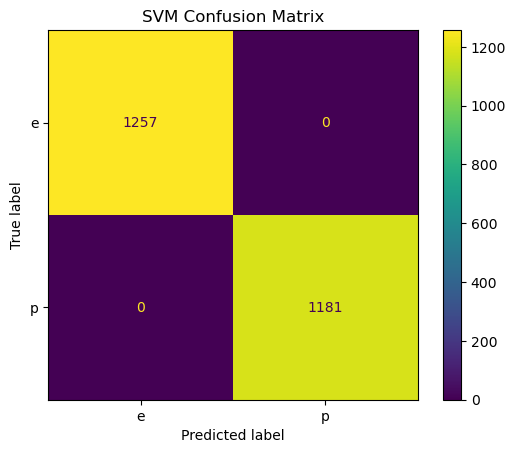

In [51]:
target = mushrooms_df['type']
features = mushrooms_df.drop(['type'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

ordinal_features = ['cap_shape', 'gill_spacing', 'stalk_root']
binary_features = [col for col in features.columns if col not in ordinal_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), ordinal_features),
        ('binary', OneHotEncoder(drop='first'), binary_features)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

log_reg = LogisticRegressionCV(cv=5, max_iter=1000)
log_reg.fit(X_train_processed, y_train)

rf_params = {'n_estimators': [100, 200], 'max_depth': [5, 10]}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_model.fit(X_train_processed, y_train)

svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_model = GridSearchCV(SVC(), svm_params, cv=5)
svm_model.fit(X_train_processed, y_train)

log_reg_preds = log_reg.predict(X_test_processed)
rf_preds = rf_model.predict(X_test_processed)
svm_preds = svm_model.predict(X_test_processed)

ConfusionMatrixDisplay.from_predictions(y_test, log_reg_preds)
plt.title("Logistic Regression Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_test, rf_preds)
plt.title("Random Forest Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_test, svm_preds)
plt.title("SVM Confusion Matrix")
plt.show()



### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: All models had perfect accuracy
- Hyper-parameters: 
    Logistic Regression: penalty, max iterations
    Random Forest: cv and param_grid

- Metrics
    - Accuracy: 1 for all 3
    - Recall: 1 for all 3
    - Precision: 1 for all 3
- How did you decide best? 
    I couldn't since they were all perfect models

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [52]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

print(nfl_draft.head())
print(nfl_draft.columns)

   Unnamed: 0  round  season                name   age position  \
0           0      1    2003   Dewayne Robertson  21.0       DL   
1           1      1    2003      Terence Newman  25.0       DB   
2           2      1    2003  Johnathan Sullivan  22.0       DL   
3           3      1    2003      Kevin Williams  23.0       DL   
4           4      1    2003       Terrell Suggs  20.0       LB   

       college_conference    height  weight  forty  vertical  broad_jump  \
0                     NaN  6.083333   317.0   5.15       NaN         NaN   
1   Big Twelve Conference  5.833333   189.0   4.37      41.0       136.0   
2                     NaN  6.250000   313.0   5.10       NaN         NaN   
3                     NaN  6.416667   304.0   4.81      30.0       112.0   
4  Pacific Ten Conference  6.250000   262.0   4.84       NaN         NaN   

   cone  shuttle  
0   NaN      NaN  
1  6.88     3.83  
2   NaN      NaN  
3  7.66     5.04  
4   NaN      NaN  
Index(['Unnamed: 0', 'roun

C:\Users\sebal\AppData\Local\Temp\ipykernel_30540\2300962065.py:35: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()


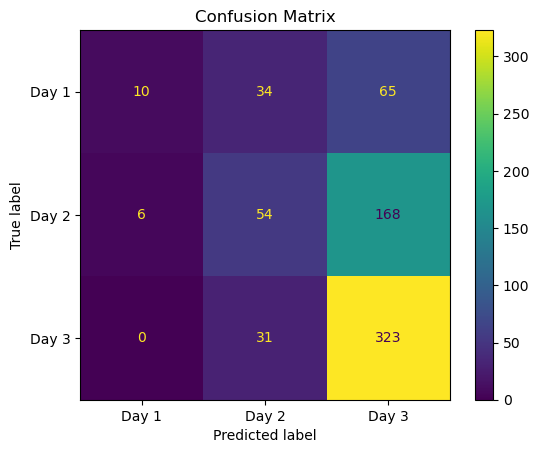

Model Accuracy: 0.56


In [53]:
def map_round_to_day(round_num):
    if round_num == 1:
        return "Day 1"
    elif round_num in [2, 3]:
        return "Day 2"
    else:
        return "Day 3"

if 'round' not in nfl_draft.columns:
    raise KeyError("The dataset does not contain the column 'round'.")

nfl_draft['day'] = nfl_draft['round'].apply(map_round_to_day)
nfl_draft = nfl_draft.drop(['round'], axis=1)

target = nfl_draft['day']
features = nfl_draft.drop(['day'], axis=1)

numeric_features = features.select_dtypes(include=['int64', 'float64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

features_processed = preprocessor.fit_transform(features)

imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean for numeric features
features_processed = imputer.fit_transform(features_processed)

X_train, X_test, y_train, y_test = train_test_split(features_processed, target, test_size=0.3, random_state=42)

y_train = y_train.ravel()

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.2f}")

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
    I chose a random forest classifier because it is a complation of multiple decision tress. This enhances the accuracy of the model
 - What was your accuracy?
    My accuracy was 56%